In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [3]:
print(np.max(x_train), np.min(x_train))

255 0


In [4]:
stand_scale = StandardScaler()

In [5]:
# x_train:fit_transform; x_valid,x_test:transform

x_train_trans = stand_scale.fit_transform(x_train.reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_trans = stand_scale.transform(x_valid.reshape(-1, 1)).reshape(-1, 28, 28)
x_test_trans = stand_scale.transform(x_test.reshape(-1, 1)).reshape(-1, 28, 28)

In [6]:
print(np.max(x_train_trans), np.min(x_train_trans))

2.023143278665243 -0.8105136544337038


In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(optimizer=keras.optimizers.SGD(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train_trans, y_train, epochs=10, validation_data=(x_valid_trans, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.9147 - accuracy: 0.7039 - val_loss: 0.6167 - val_accuracy: 0.7944
Epoch 2/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.5777 - accuracy: 0.8022 - val_loss: 0.5221 - val_accuracy: 0.8242
Epoch 3/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5099 - accuracy: 0.8215 - val_loss: 0.4805 - val_accuracy: 0.8362
Epoch 4/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4741 - accuracy: 0.8346 - val_loss: 0.4547 - val_accuracy: 0.8440
Epoch 5/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4503 - accuracy: 0.8429 - val_loss: 0.4403 - val_accuracy: 0.8494
Epoch 6/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4332 - accuracy: 0.8486 - val_loss: 0.4256 - val_accuracy: 0.8546
Epoch 7/10
55000/55000 [===========================

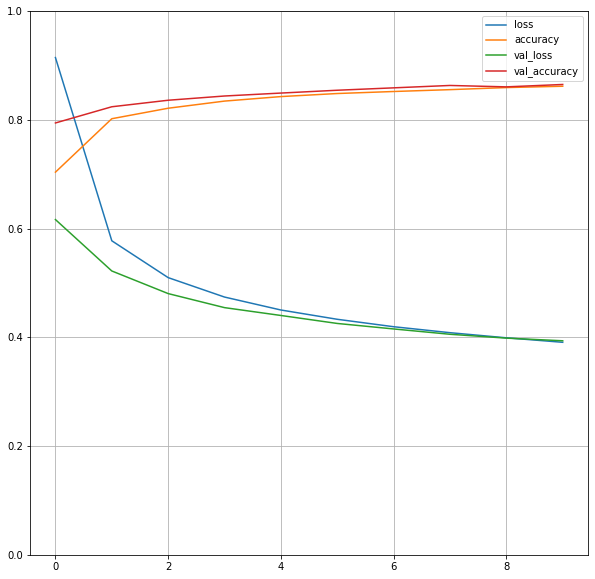

In [16]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,10))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [11]:
model.evaluate(x_test_trans, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.4265 - accuracy: 0.8477


[0.426499648809433, 0.8477]